In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df = pd.read_csv('./files/2020 November General Election - Turnout Rates.csv')

In [58]:
df.head(3)

,State,Source,Official/Unofficial,Total Ballots Counted (Estimate),Vote for Highest Office (President),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon,Overseas Eligible,State Abv
0,United States,NaN,NaN,"158,835,004",NaN,66.4%,"239,247,182","257,605,088",7.8%,"1,461,074","1,962,811","616,440","3,294,457","4,971,025",NaN
1,Alabama,https://www2.alabamavotes.gov/electionnight/st...,Unofficial,"2,306,587","2,297,295",62.6%,"3,683,055","3,837,540",2.3%,"25,898","50,997","10,266","67,782",NaN,AL
2,Alaska,https://www.elections.alaska.gov/results/20GEN...,NaN,"367,000",NaN,69.8%,"525,568","551,117",3.4%,"4,293","2,074","1,348","6,927",NaN,AK


In [59]:
# df.columns['국가','출처','공식,비공식','집계총투표수','회장단투표','VEP투표율','투표가능인구','투표연령인구','비시민권자인권','감옥','집행유예횟수','가석방수','총부적격수','해외적격수','주Abv']

In [60]:
df.isnull().sum()

State                                   0
Source                                 12
Official/Unofficial                    27
Total Ballots Counted (Estimate)        0
Vote for Highest Office (President)    28
VEP Turnout Rate                        0
Voting-Eligible Population (VEP)        0
Voting-Age Population (VAP)             0
% Non-citizen                           0
Prison                                  0
Probation                               0
Parole                                  0
Total Ineligible Felon                  0
Overseas Eligible                      51
State Abv                               1
dtype: int64

In [66]:
df.drop(columns=['Source','Official/Unofficial','Vote for Highest Office (President)','Overseas Eligible','State Abv'],inplace=True)

In [67]:
df.head(3)

,State,Total Ballots Counted (Estimate),VEP Turnout Rate,Voting-Eligible Population (VEP),Voting-Age Population (VAP),% Non-citizen,Prison,Probation,Parole,Total Ineligible Felon
0,United States,"158,835,004",66.4%,"239,247,182","257,605,088",7.8%,"1,461,074","1,962,811","616,440","3,294,457"
1,Alabama,"2,306,587",62.6%,"3,683,055","3,837,540",2.3%,"25,898","50,997","10,266","67,782"
2,Alaska,"367,000",69.8%,"525,568","551,117",3.4%,"4,293","2,074","1,348","6,927"


In [68]:
df.columns=['국가','총투표수','VEP투표율','투표가능인구','투표연령인구','비시민권자투표비율','감옥','집행유예','가석방수','총부적격수']

In [70]:
df.head()

,국가,총투표수,VEP투표율,투표가능인구,투표연령인구,비시민권자투표비율,감옥,집행유예,가석방수,총부적격수
0,United States,"158,835,004",66.4%,"239,247,182","257,605,088",7.8%,"1,461,074","1,962,811","616,440","3,294,457"
1,Alabama,"2,306,587",62.6%,"3,683,055","3,837,540",2.3%,"25,898","50,997","10,266","67,782"
2,Alaska,"367,000",69.8%,"525,568","551,117",3.4%,"4,293","2,074","1,348","6,927"
3,Arizona,"3,400,000",65.5%,"5,189,000","5,798,473",8.9%,"38,520","76,844","7,536","93,699"
4,Arkansas,"1,212,030",55.5%,"2,182,375","2,331,171",3.6%,"17,510","36,719","24,698","64,974"


In [75]:
list_count=['총투표수','투표가능인구','투표연령인구','감옥','집행유예','가석방수','총부적격수']

In [76]:
list_perc = ['VEP투표율','비시민권자투표비율']

In [77]:
for i in list_count:
    df[i] = df[i].str.replace(',','')
for i in list_perc:
    df[i] = df[i].str.replace('%','')

In [78]:
df[list_count] = df[list_count].astype('int')
df[list_perc] = df[list_perc].astype('float')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   국가         52 non-null     object 
 1   총투표수       52 non-null     int32  
 2   VEP투표율     52 non-null     float64
 3   투표가능인구     52 non-null     int32  
 4   투표연령인구     52 non-null     int32  
 5   비시민권자투표비율  52 non-null     float64
 6   감옥         52 non-null     int32  
 7   집행유예       52 non-null     int32  
 8   가석방수       52 non-null     int32  
 9   총부적격수      52 non-null     int32  
dtypes: float64(2), int32(7), object(1)
memory usage: 2.8+ KB


In [80]:
df.head()

,국가,총투표수,VEP투표율,투표가능인구,투표연령인구,비시민권자투표비율,감옥,집행유예,가석방수,총부적격수
0,United States,158835004,66.4,239247182,257605088,7.8,1461074,1962811,616440,3294457
1,Alabama,2306587,62.6,3683055,3837540,2.3,25898,50997,10266,67782
2,Alaska,367000,69.8,525568,551117,3.4,4293,2074,1348,6927
3,Arizona,3400000,65.5,5189000,5798473,8.9,38520,76844,7536,93699
4,Arkansas,1212030,55.5,2182375,2331171,3.6,17510,36719,24698,64974


In [82]:
df_temp = df.set_index('국가')

In [83]:
corr =df_temp.corr()

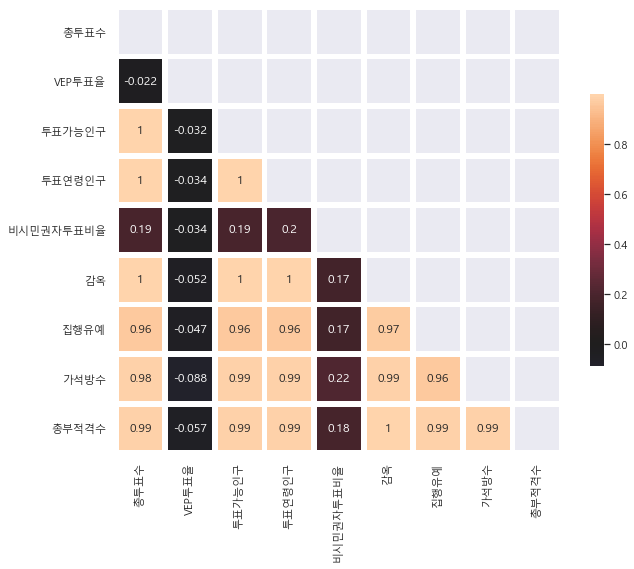

In [90]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
sns.heatmap(corr,mask=mask,center=0,annot=True,square=True,linewidths=5,cbar_kws={"shrink": .5})
plt.show()
pass

In [91]:
import matplotlib as mpl
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus']= False
path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family=font_name)

In [92]:
df_temp

,총투표수,VEP투표율,투표가능인구,투표연령인구,비시민권자투표비율,감옥,집행유예,가석방수,총부적격수
국가,,,,,,,,,
United States,158835004,66.4,239247182,257605088,7.8,1461074,1962811,616440,3294457
Alabama,2306587,62.6,3683055,3837540,2.3,25898,50997,10266,67782
Alaska,367000,69.8,525568,551117,3.4,4293,2074,1348,6927
Arizona,3400000,65.5,5189000,5798473,8.9,38520,76844,7536,93699
Arkansas,1212030,55.5,2182375,2331171,3.6,17510,36719,24698,64974
California,16800000,64.7,25962648,30783255,15.0,104730,0,102586,207316
Colorado,3295000,76.4,4313054,4595504,5.7,18905,0,0,18905
Connecticut,1850000,71.1,2603327,2839560,7.7,13268,0,4452,17720
Delaware,507805,70.5,720531,780822,5.8,5874,14176,350,15013


Text(0, 0.5, 'VEP투표율(%)')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53804 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44397 missing from c

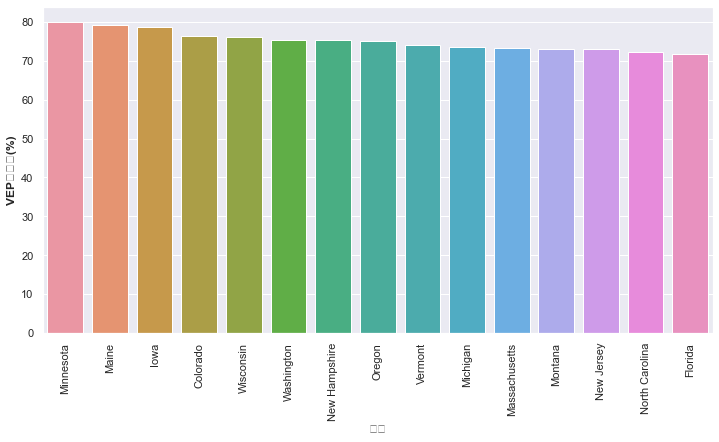

In [97]:
sns.set(style='darkgrid')
plt.figure(figsize=(12,6))
sns.barplot(x='국가',y='VEP투표율',data=df,order=df_temp['VEP투표율'].sort_values(ascending=False).index[:15])
plt.xticks(rotation=90)
plt.xlabel('국가',weight='bold')
plt.ylabel('VEP투표율(%)',weight='bold')

No handles with labels found to put in legend.


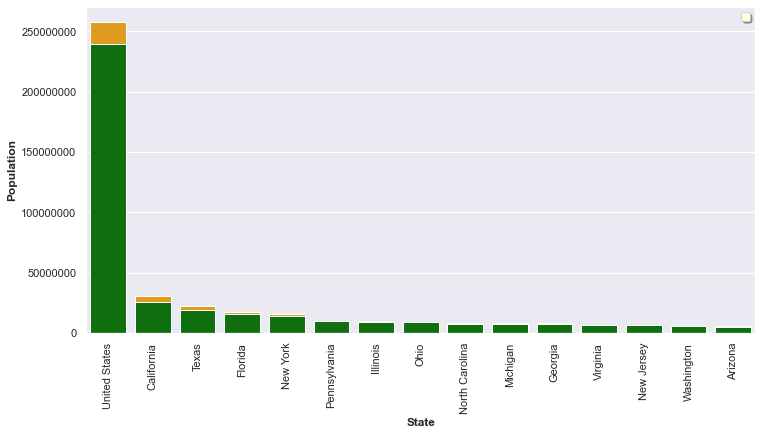

In [111]:
plt.figure(figsize=(12,6))
sns.barplot(x='국가',y='투표연령인구',data=df,order=df_temp['투표연령인구'].sort_values(ascending=False).index[:15],color='orange')
sns.barplot(x='국가',y='투표가능인구',data=df,order=df_temp['투표가능인구'].sort_values(ascending=False).index[:15],color='green')
plt.xticks(rotation=90)
plt.xlabel('State',weight='bold')
plt.ylabel('Population',weight='bold')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.legend(shadow=True,facecolor='lightyellow')
plt.show()